<a href="https://colab.research.google.com/github/Wincenttjoi/employee-data-visualization/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as scst
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
url = 'https://raw.githubusercontent.com/Wincenttjoi/employee-data-visualization/main/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


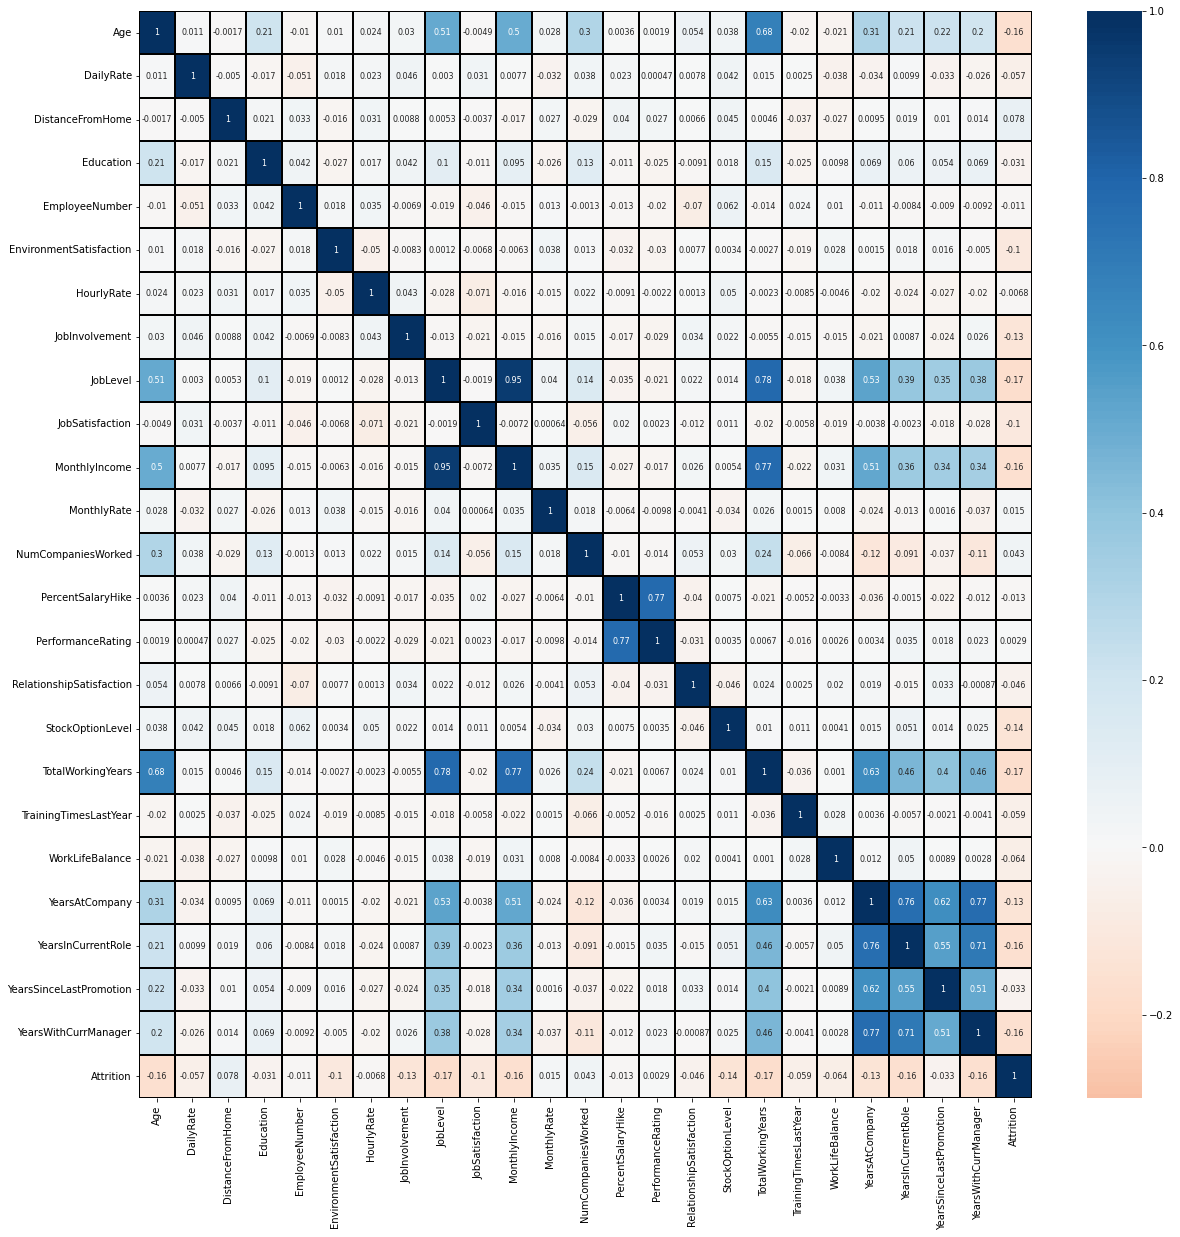

In [15]:
df_numerical = df.select_dtypes("int")
df_numerical = df_numerical.join(df['Attrition'])
df_numerical['Attrition'] = df_numerical['Attrition'].replace(['Yes', 'No'], [1,0])
df_numerical['Attrition'] = df_numerical['Attrition'].astype(float)
corr_table = df_numerical.corr()
corr_table.drop(labels=['EmployeeCount', 'StandardHours'], inplace=True)
corr_table.drop(labels=['EmployeeCount', 'StandardHours'], axis=1, inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr_table, 
            annot=True, 
            cmap="RdBu", 
            center=0, 
            annot_kws={"size":8}, 
            vmin=-0.3, 
            vmax=1, 
            linewidth=1, 
            linecolor='black')
plt.show()

In [16]:
# hvplot not well supported under google collab, hence done in my local jupyter notebook
# df_numerical.drop('Attrition', axis=1).corrwith(df_numerical.Attrition).dropna().hvplot.barh(height=600, width=1000)

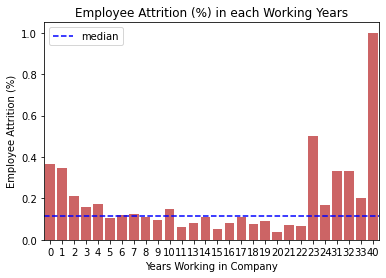

Number of workers that has/have been working for 40 years:  1  person


In [17]:
fig, ax = plt.subplots()

# Years in Company
# total
total_cr = df.groupby('YearsAtCompany')['Attrition'].count()

# attrition only
cond = df['Attrition'] == 'Yes'
temp_cr = df.loc[cond, 'YearsAtCompany']
temp_cr = temp_cr.groupby(temp_cr.values).count()
prop_cr = temp_cr / total_cr
prop_cr = prop_cr.dropna()
sns.barplot(data=prop_cr, x=prop_cr.index, y=prop_cr.values, order=prop_cr, color="C3", alpha=0.8)
ax.set_xticklabels(prop_cr.index, fontsize=10)

plt.axhline(y=np.median(prop_cr), color='blue', ls='--', lw=1.5, label='median')
plt.title('Employee Attrition (%) in each Working Years')
plt.ylabel('Employee Attrition (%)', fontsize=10)
plt.xlabel('Years Working in Company')
plt.legend()
plt.show()

temp = df[df['YearsAtCompany'] == 40]
no_worker_40_year = temp.iloc[:,0].count()
print("Number of workers that has/have been working for 40 years: ", no_worker_40_year, " person")

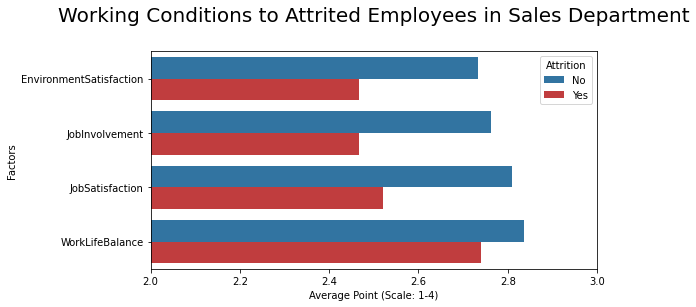

Since pvalue = 9.862723798024496e-08 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of EnvironmentSatisfaction of attrited employees is lesser than those employees who stay
Since pvalue = 4.648126106990931e-19 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of JobInvolvement of attrited employees is lesser than those employees who stay
Since pvalue = 7.979024618434098e-20 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of WorkLifeBalance of attrited employees is lesser than those employees who stay
Since pvalue = 0.032576632418381664 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of JobSatisfaction of attrited employees is lesser than those employees who stay


In [18]:
f, ax = plt.subplots(figsize=(8,4))

sales = df[df['Department'] == 'Sales']
sales = sales[['EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'JobSatisfaction']]
sales_df = sales.reset_index().melt('index', var_name='Factors', value_name='avg')
sales_df = sales_df.set_index('index').join(df['Attrition'])
sales_df = sales_df.groupby(['Attrition', 'Factors']).agg(avg = ("avg", 'mean'))
sales_df = sales_df.reset_index()

sns.barplot(x="avg", y="Factors", hue="Attrition", data=sales_df, palette=["C0", "C3"])
ax.set(xlim=(2,3))
ax.set_ylabel("Factors", fontsize=10)
ax.set_xlabel("Average Point (Scale: 1-4)", fontsize=10)
ax.set_title("Working Conditions to Attrited Employees in Sales Department", fontsize=20, pad=30)
plt.show()

def conduct_hypothesis_testing():
  sales_not_attr_avg = np.array(sales_df.loc[sales_df['Attrition'] == 'No', "avg"])
  sales_attr_avg = np.array(sales_df.loc[sales_df['Attrition'] == 'Yes', "avg"])
  n = np.array(sales.count())
  sd = np.array(sales.std())
  zvalue = (sales_attr_avg  - sales_not_attr_avg) / (sd / n**0.5)
  pvalue = scst.norm.sf(abs(zvalue))

  sig_level = 0.05
  for i in range(len(pvalue)):
      if pvalue[i] < sig_level:
          print("Since pvalue =", pvalue[i], "is smaller than significance level of", sig_level, ", we reject null hypothesis and have sufficient evidence conclude that mean of", sales.columns[i], 
                "of attrited employees is lesser than those employees who stay")
      else:
          print("Since pvalue =", pvalue[i], "is greater than significance level of", sig_level, ", we do not reject null hypothesis and have insufficient evidence to conclude that mean of", sales.columns[i], 
          "of attrited employees is lesser than those employees who stay")
  

conduct_hypothesis_testing()

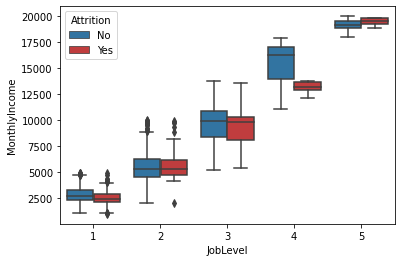

In [19]:
###### Monthly income and job level

### Monthly income vs job level -> Monthly income is correlated to job level

sns.boxplot(y='MonthlyIncome', x='JobLevel', hue='Attrition', data=df, hue_order=['No', 'Yes'], palette=["C0", "C3"])
plt.show()

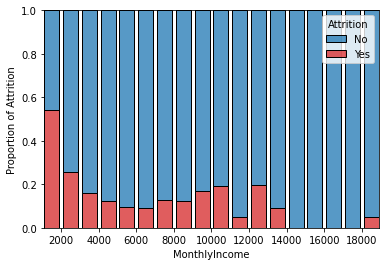

In [20]:
### 100% stacked histogram of x=income and y=attrition
bins_hist = range(1000, 20000, 1000)
p = sns.histplot(
    data=df,
    bins = bins_hist,
    x="MonthlyIncome", hue="Attrition",
    multiple="fill", stat="proportion",
    shrink=.8, hue_order=['No', 'Yes'], palette=["C0", "C3"]
)
p.set_ylabel("Proportion of Attrition")
plt.show()

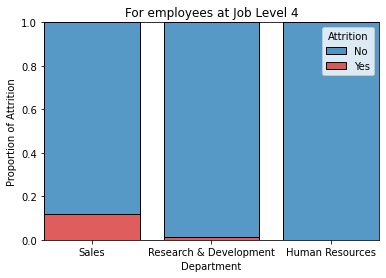

In [21]:
### Histogram for Department with attrition where JobLevel = 4
p = sns.histplot(
    data=df.where(df["JobLevel"] == 4),
    bins = bins_hist,
    x="Department", hue="Attrition", hue_order=['No', 'Yes'], palette=["C0", "C3"],
    multiple="fill", stat="proportion",
    shrink=.8
)
p.set_ylabel("Proportion of Attrition")
p.set_title("For employees at Job Level 4")
plt.show()

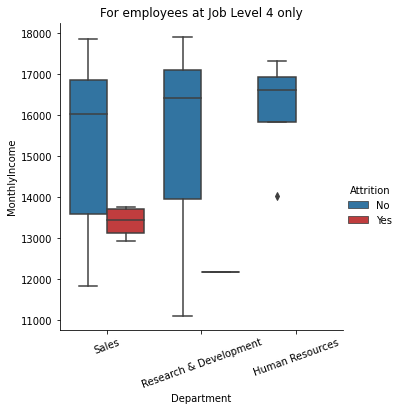

In [22]:
### Box plot for y = Income, x = Department, hue = Attrition when joblevel = 4
p = sns.catplot(y='MonthlyIncome', x='Department', hue='Attrition', kind="box", 
            data=df.where(df['JobLevel'] == 4), hue_order=['No', 'Yes'], 
            palette=["C0", "C3"])
plt.title("For employees at Job Level 4 only")
plt.xticks(rotation=20)
plt.show()

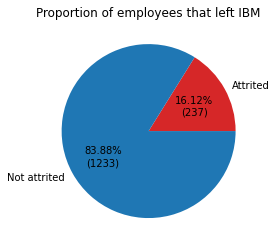

In [23]:
### Pie chart of attrition rate
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, x*total/100)

total = df.shape[0]
count_attrition = df[df['Attrition'] == 'Yes'].shape[0]
count_attrition_no = total - count_attrition
counts = [count_attrition, count_attrition_no]
labels = ['Attrited', 'Not attrited']
plt.pie(counts, labels = labels, autopct=my_fmt, colors=["C3", "C0"])
plt.title('Proportion of employees that left IBM')
plt.show()